#### Raw data source: https://data.coa.gov.tw/open_search.aspx?id=ccezNvv4oYbO

#### Setup and load file

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
df = pd.read_csv('animal_estimate_data/animal_estimate.csv', 
                na_values=[
                    '0.0'
                ])

In [5]:
# each row shows how many households own a cat or a dog in each year each country/city

df.head(10)

,流水號,年度,縣市代碼,縣市名,家犬總估計數,家貓總估計數,遊蕩犬總估計數,備註
0,401,111,City000022,連江縣,22.0,NaN,NaN,NaN
1,400,111,City000021,金門縣,161.0,NaN,NaN,NaN
2,399,111,City000013,嘉義市,2695.0,NaN,NaN,NaN
3,398,111,City000006,新竹市,2657.0,NaN,NaN,NaN
4,397,111,City000001,基隆市,1570.0,NaN,NaN,NaN
5,396,111,City000020,澎湖縣,2217.0,NaN,NaN,NaN
6,395,111,City000018,花蓮縣,11762.0,NaN,NaN,NaN
7,394,111,City000017,臺東縣,6757.0,NaN,NaN,NaN
8,393,111,City000016,屏東縣,11711.0,NaN,NaN,NaN
9,392,111,City000012,嘉義縣,12111.0,NaN,NaN,NaN


#### Preliminary data cleaning?

In [6]:
# the raw file has 0s for missing data, we replace them with NaN
# replace all '0' with NaN

df = df.replace(0, np.nan)

In [7]:
# renaming headers

df.rename(columns={
            '年度': 'year', 
            '縣市代碼': 'id', 
            '縣市名': 'city',
            '家犬總估計數': 'household_dog', 
            '家貓總估計數': 'household_cat', 
            '遊蕩犬總估計數': 'stray_dog', 
            '備註': 'note'}, 
            inplace=True)


In [8]:
df.year+=1911

In [9]:
df.head()

,流水號,year,id,city,household_dog,household_cat,stray_dog,note
0,401,2022,City000022,連江縣,22.0,NaN,NaN,NaN
1,400,2022,City000021,金門縣,161.0,NaN,NaN,NaN
2,399,2022,City000013,嘉義市,2695.0,NaN,NaN,NaN
3,398,2022,City000006,新竹市,2657.0,NaN,NaN,NaN
4,397,2022,City000001,基隆市,1570.0,NaN,NaN,NaN


#### Q1. Does dog ownership correlate with numbers of stray dogs? 
- I would probably need regression anaylsis with this one to find out the relations though
- **check their estimate method** to see whether I need to normalize it with population or number of household

In [10]:
# drop unnecessary columns
df2 = df.drop(['household_cat','note'], axis=1)

# drop all the rows with NaN
df2 = df2.dropna(axis=0)
df2.to_csv('stray_dog.csv', index=False)
df2

,流水號,year,id,city,household_dog,stray_dog
134,189,2015,City000013,嘉義市,20895.0,3535.0
135,188,2015,City000006,新竹市,39243.0,1862.0
136,187,2015,City000001,基隆市,27833.0,404.0
138,185,2015,City000018,花蓮縣,35741.0,4807.0
139,184,2015,City000017,臺東縣,24599.0,3229.0
...,...,...,...,...,...,...
318,5,2001,City000007,苗栗縣,36897.0,11302.0
319,4,2001,City000005,新竹縣,43337.0,4828.0
320,3,2001,City000004,桃園縣,133657.0,16187.0
321,2,2001,City000019,宜蘭縣,28223.0,8430.0


`geom_smooth()` using formula = 'y ~ x'


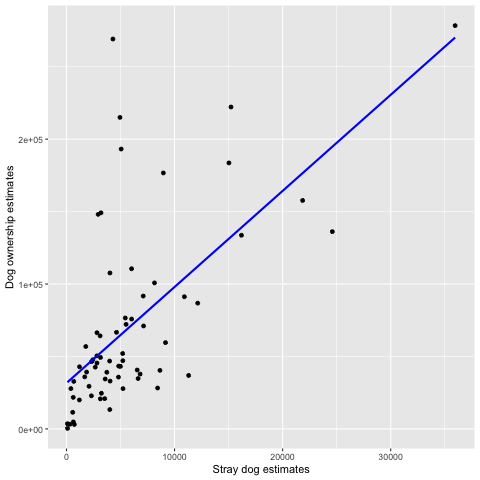

In [11]:
%%R

# plotting scatter plot
df <- read.csv('animal_estimate_data/stray_dog.csv')

ggplot(df) +
    aes(x=stray_dog, y =household_dog) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(x = "Stray dog estimates", y = "Dog ownership estimates")

#### Q2. How has pet ownership changed over time in Taiwan (nationally)?

In [12]:
# drop unnecessary columns: drop 'estimate stray dogs', 'note' columns
df3 = df.drop(['stray_dog','note'], axis=1)

# drop all the rows with NaN
df3 = df3.dropna(axis=0)

# get a sense of the dataset
df3

,流水號,year,id,city,household_dog,household_cat
22,358,2021,City000003,新北市,180116.0,138551.0
23,379,2021,City000022,連江縣,375.0,68.0
24,378,2021,City000021,金門縣,4899.0,1781.0
25,377,2021,City000013,嘉義市,13618.0,7133.0
26,376,2021,City000006,新竹市,21975.0,14955.0
...,...,...,...,...,...,...
293,30,2003,City000007,苗栗縣,59044.0,3106.0
294,29,2003,City000005,新竹縣,38549.0,23183.0
295,28,2003,City000004,桃園縣,92638.0,22910.0
296,27,2003,City000019,宜蘭縣,20304.0,2079.0


In [13]:
# some years have more data than others

df3.year.value_counts()

year
2009    24
2007    23
2005    23
2021    22
2019    22
2003    22
2013    20
2011    20
2017    19
2015    19
Name: count, dtype: int64

In [16]:
# cities were named differntly in different years
# that's why some of the years have more data than others
# the ids are consistent but some cities are not collected in some years

df3.groupby('year').nunique("id")

,流水號,id,city,household_dog,household_cat
year,,,,,
2003,22,19,22,22,22
2005,23,20,23,23,23
2007,23,20,23,23,23
2009,24,21,24,24,24
2011,20,20,20,20,20
2013,20,20,20,20,20
2015,19,19,19,19,19
2017,19,19,19,19,19
2019,22,22,22,22,22


In [19]:
# year 2015 and 2017 have the least data points
# we will use 2015 as the base year

df2015_dog_cat = df3[df3.year == 2015]
id_2015 = list(df2015_dog_cat.id.unique())

In [20]:
# apply the same ids to all the years
df3 = df3[df3['id'].isin(id_2015) == True]

# group by year and sum the number of households with cats and dogs
df3 = df3.groupby(['year']).sum(['household_cat', 'household_dog']).drop(columns=['流水號'])

# save the file
df3.to_csv('dog_cat_national.csv')

#### Q3. What if I want to compare pet ownership change within the cities?

In [ ]:
df3.groupby('年度').縣市代碼.value_counts()

In [ ]:
# different numbers in 
df3.groupby('年度').nunique("縣市代碼")

In [ ]:
df3.縣市名.value_counts()

#### Q4. Which city/county has a higher ratio of cats?

In [ ]:
%%R

df$Month <- as.Date(df$Month, format = "%m/%d/%Y")

ggplot(df) +
    aes(x=Month, y=Value, fill=Metric) +
    geom_area() 